<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/250516_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [ ]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Create the data parameters
weight = 0.3
bias = 0.9
# Make X and y using linear regression feature
X = torch.arange(0,1,0.01)
y = weight * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [ ]:
# Split the data into training and testing
X_train = X[:int(len(X) * 0.8)]
y_train = y[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]
y_test = y[int(len(X) * 0.8):]

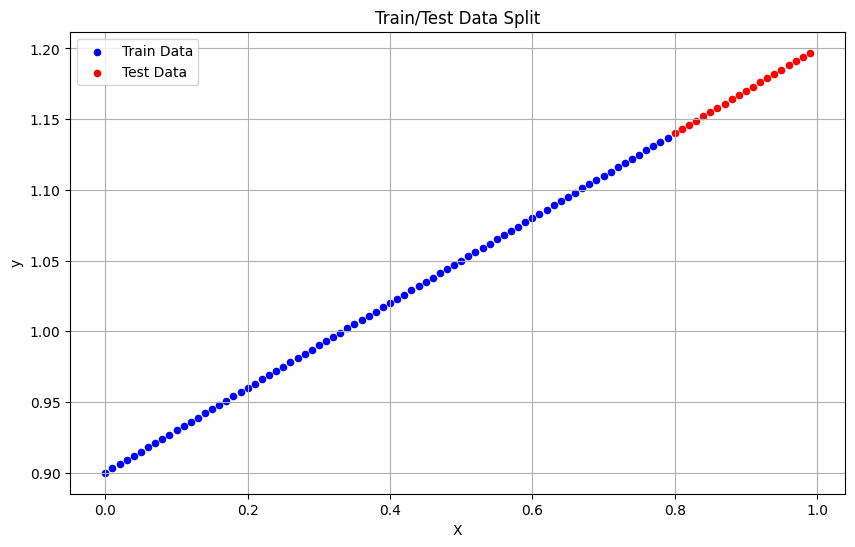

In [ ]:
# Plot the training and testing data
plt.figure(figsize=(10, 6))

# Training data
plt.scatter(X_train, y_train, label="Train Data", c="blue", s=20)

# Testing data
plt.scatter(X_test, y_test, label="Test Data", c="red", s=20)

# Labeling
plt.title("Train/Test Data Split")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module
# Subclassing nn.Module to define a custom Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weight and bias as parameters with gradient tracking
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weight * x + self.bias

In [ ]:
# Instantiate the model and put it to the target device
# 모델 인스턴스 생성
model = LinearRegressionModel()

# 모델을 지정한 device로 이동 (GPU가 사용 가능하면 CUDA로, 아니면 CPU로)
model = model.to(device)

# 모델이 위치한 디바이스 확인
print(f"📍 Model is on device: {next(model.parameters()).device}")

📍 Model is on device: cuda:0


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer
# 손실 함수: 평균 절대 오차 (Mean Absolute Error)
loss_fn = nn.L1Loss()

# 옵티마이저: 확률적 경사 하강법(SGD), 학습률 0.01
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
# Training loop


# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.786 | Test loss: 0.457
Epoch: 20 | Train loss: 0.555 | Test loss: 0.186
Epoch: 40 | Train loss: 0.324 | Test loss: 0.085
Epoch: 60 | Train loss: 0.206 | Test loss: 0.257
Epoch: 80 | Train loss: 0.177 | Test loss: 0.324
Epoch: 100 | Train loss: 0.166 | Test loss: 0.348
Epoch: 120 | Train loss: 0.158 | Test loss: 0.351
Epoch: 140 | Train loss: 0.150 | Test loss: 0.344
Epoch: 160 | Train loss: 0.144 | Test loss: 0.331
Epoch: 180 | Train loss: 0.137 | Test loss: 0.316
Epoch: 200 | Train loss: 0.130 | Test loss: 0.300
Epoch: 220 | Train loss: 0.123 | Test loss: 0.285
Epoch: 240 | Train loss: 0.116 | Test loss: 0.270
Epoch: 260 | Train loss: 0.109 | Test loss: 0.255
Epoch: 280 | Train loss: 0.102 | Test loss: 0.239


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([1.3195, 1.3273, 1.3350, 1.3428, 1.3505, 1.3583, 1.3660, 1.3738, 1.3816,
        1.3893, 1.3971, 1.4048, 1.4126, 1.4203, 1.4281, 1.4358, 1.4436, 1.4513,
        1.4591, 1.4668], device='cuda:0')

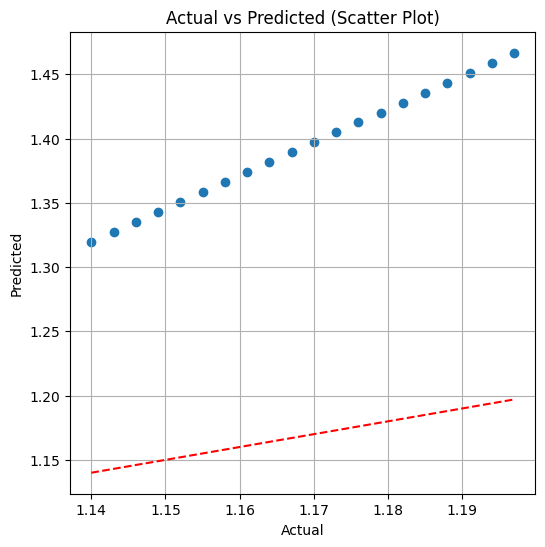

In [ ]:
# Plot the predictions (these may need to be on a specific device)
y_preds_cpu = y_preds.cpu().numpy()
y_test_cpu = y_test.cpu().numpy()

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test_cpu, y_preds_cpu)
plt.plot([y_test_cpu.min(), y_test_cpu.max()],
         [y_test_cpu.min(), y_test_cpu.max()],
         'r--')  # 이상적인 직선
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Scatter Plot)")
plt.grid(True)
plt.show()

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory
path = Path("models")
path.mkdir(parents=True, exist_ok=True)
# 2. Create model save path
name = "01_pytorch_workflow_model_0.pth"
model_path = path / name
# 3. Save the model state dict
torch.save(obj=model.state_dict(),
           f=model_path)

In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
lr_model_loaded = LinearRegressionModel()
lr_model_loaded.load_state_dict(torch.load(f=model_path))
lr_model_loaded.to(device)

LinearRegressionModel()

In [ ]:
# Make predictions with loaded model and compare them to the previous
y_preds_loaded = lr_model_loaded(X_test)
y_preds_loaded

tensor([1.3195, 1.3273, 1.3350, 1.3428, 1.3505, 1.3583, 1.3660, 1.3738, 1.3816,
        1.3893, 1.3971, 1.4048, 1.4126, 1.4203, 1.4281, 1.4358, 1.4436, 1.4513,
        1.4591, 1.4668], device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
y_preds_loaded == y_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')